## E-News Express Project

## Background: 

An online news portal aims to expand its business by acquiring new subscribers. Every visitor to the website takes certain actions based on their interest. The company plans to analyze these interests and wants to determine whether a new feature will be effective or not. Companies often analyze users' responses to two variants of a product to decide which of the two variants is more effective. This experimental technique is known as a/b testing that is used to determine whether a new feature attracts users based on a chosen metric.

Suppose you are hired as a Data Scientist in E-news Express. The design team of the company has created a new landing page. You have been assigned the task to decide whether the new landing page is more effective to gather new subscribers. Suppose you randomly selected 100 users and divided them equally into two groups. The old landing page is served to the first group (control group) and the new landing page is served to the second group (treatment group). Various data about the customers in both groups are collected in 'abtest.csv'. Perform the statistical analysis to answer the following questions using the collected data.

Objective:

Statistical analysis of business data. Explore the dataset and extract insights from the data. The idea is for you to get comfortable with doing statistical analysis in Python.

You are expected to perform the statistical analysis to answer the following questions:

Explore the dataset and extract insights using Exploratory Data Analysis.  
Do the users spend more time on the new landing page than the old landing page?  
Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?  
Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]
Is the mean time spent on the new page same for the different language users?
*Consider a significance level of 0.05 for all tests.

### Import the necessary libraries

In [1]:
#import the important packages
import pandas as pd #library used for data manipulation and analysis
import numpy as np # library used for working with arrays.
import matplotlib.pyplot as plt # library for plots and visualisations
import seaborn as sns # library for visualisations
%matplotlib inline 

import scipy.stats as stats # this library contains a large number of probability distributions as well as a growing library of statistical functions.

### Reading the data into the DataFrame

In [2]:
df = pd.read_csv('abtest.csv')

## 1. EDA

In [3]:
# checking the shape of the data
df.shape

(100, 6)

* The datset consists of 1338 rows and 7 columns

In [4]:
# inspecting the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


* There are 4 numeric variables and 3 categorical variables

In [5]:
# checking if there are any missing values
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

* There are no missing values in the data

In [6]:
# checking the first 5 rows of the data
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [7]:
df.corr()

,user_id,time_spent_on_the_page
user_id,1.000000,-0.372868
time_spent_on_the_page,-0.372868,1.000000


In [8]:
df.describe(include='all') # compute summary stats on all the columns

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
count,100.000000,100,100,100.000000,100,100
unique,NaN,2,2,NaN,2,3
top,NaN,control,old,NaN,yes,Spanish
freq,NaN,50,50,NaN,54,34
mean,546517.000000,NaN,NaN,5.377800,NaN,NaN
std,52.295779,NaN,NaN,2.378166,NaN,NaN
min,546443.000000,NaN,NaN,0.190000,NaN,NaN
25%,546467.750000,NaN,NaN,3.880000,NaN,NaN
50%,546492.500000,NaN,NaN,5.415000,NaN,NaN
75%,546567.250000,NaN,NaN,7.022500,NaN,NaN


In [9]:
df.describe(exclude='number') # compute summary stats on just the categorical columns

,group,landing_page,converted,language_preferred
count,100,100,100,100
unique,2,2,2,3
top,control,old,yes,Spanish
freq,50,50,54,34


In [10]:
df['user_id'].value_counts().shape

(100,)

#### Observations:

* The useID is a customers unique ID, there are 100 unique IDs

* The average time spent on a page overall is about 5.4 minutes with a standard deviation of about 2.4 minutes

* Spanish is the top preferred language with about 34 users (out of 100) choosing spannish as a preferred language.

* Overall, 54 total customers were converted

In [11]:
# function to plot a boxplot and a histogram along the same scale.

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [12]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

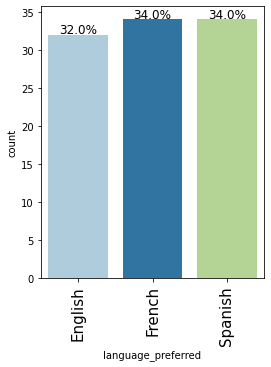

In [13]:
labeled_barplot(df, 'language_preferred', perc=True)

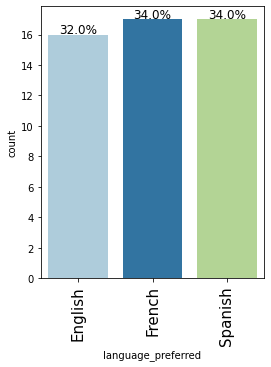

In [14]:
labeled_barplot(df[df['landing_page']=='old'], 'language_preferred', perc=True)

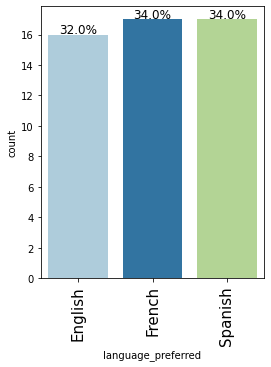

In [15]:
labeled_barplot(df[df['landing_page']=='new'], 'language_preferred', perc=True)

## Observation
Seems like there was an even split between the languages overall. The same split was carried to both the new and old landing pages.

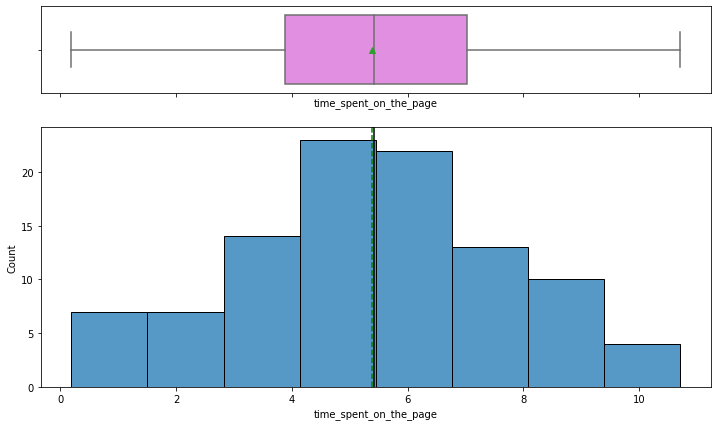

In [16]:
histogram_boxplot(df, 'time_spent_on_the_page')

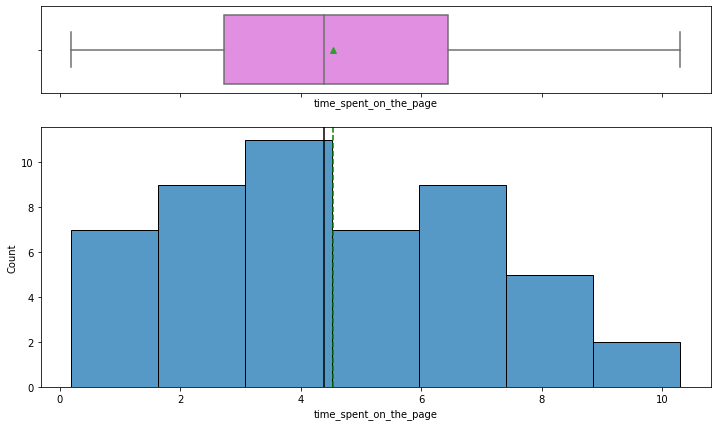

In [17]:
histogram_boxplot(df[df['landing_page']=='old'], 'time_spent_on_the_page')

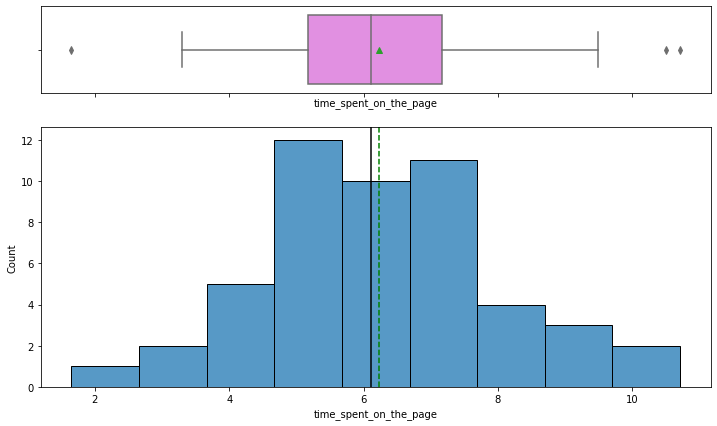

In [18]:
histogram_boxplot(df[df['landing_page']=='new'], 'time_spent_on_the_page')

### Observation
Overall seems like the data is normally distributed with mean time spent on page of about 5 mins overall. Both the new and old landing pages both show a normal distribution (which will come in handy of statistical analysis). Seems like customers spent on average longer time on the new page than on the old page. 

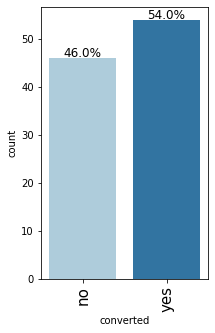

In [19]:
labeled_barplot(df, 'converted', perc=True)

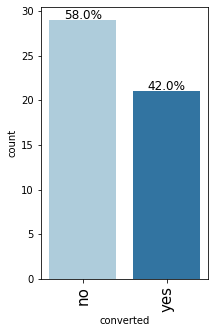

In [20]:
labeled_barplot(df[df['landing_page']=='old'], 'converted', perc=True)

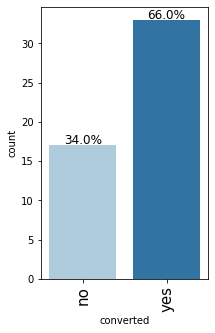

In [21]:
labeled_barplot(df[df['landing_page']=='new'], 'converted', perc=True)

### Observation
Seems like the new page converted more customers than the old page 66% and 42% respectively

# Multi-Variate Analysis 

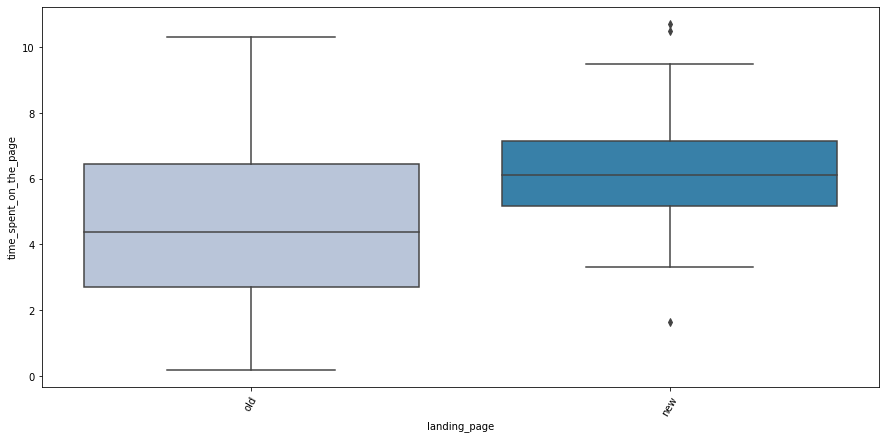

In [22]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "landing_page", y = "time_spent_on_the_page", data = df, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.show()

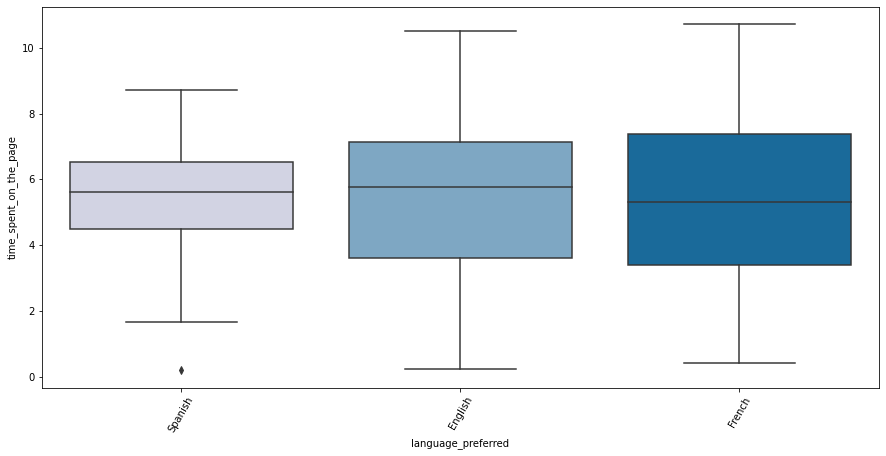

In [23]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "language_preferred", y = "time_spent_on_the_page", data = df, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.show()

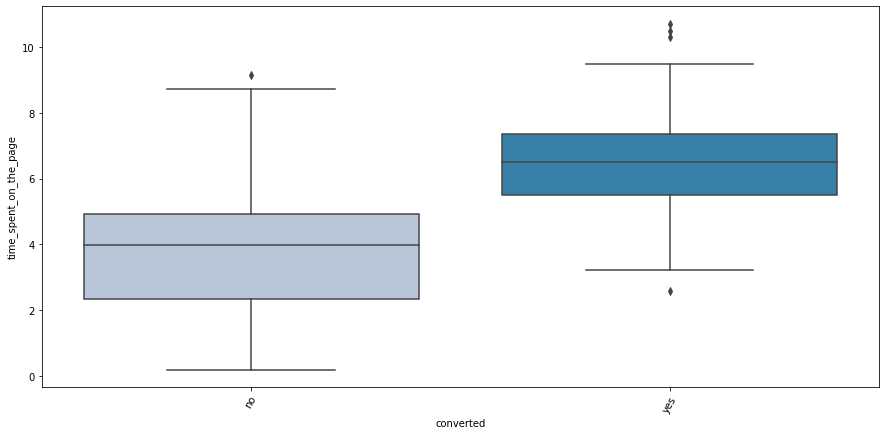

In [24]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "converted", y = "time_spent_on_the_page", data = df, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.show()

# Observation
1. seems more time was spent on the new page and the change in page lead to more time being spent on the site 
2. Does not seem like the language had much of an effect on the time a customer spent on the page 
3. It does look like the longer a customer spent on the page the more likely they were to convert

## 2. Do the users spend more time on the new landing page than the old landing page?

In [25]:
# We can find the average mean time spent on the new vs old landing page
df_new =df[df['landing_page']=='new']
df_new_mean = round(df_new['time_spent_on_the_page'].mean(),2)
df_new_std = round(df_new['time_spent_on_the_page'].std(),2)
df_old = df[df['landing_page']=='old']
df_old_mean = round(df_old['time_spent_on_the_page'].mean(),2)
df_old_std = round(df_old['time_spent_on_the_page'].std(),2)

print('The average time spent on the new page is {} minutes'.format(df_new_mean))
print('The average time spent on the old page is {} minutes'.format(df_old_mean))
print('The std for new page is {} minutes'.format(df_new_std))
print('The std for old page is {} minutes'.format(df_old_std))


The average time spent on the new page is 6.22 minutes
The average time spent on the old page is 4.53 minutes
The std for new page is 1.82 minutes
The std for old page is 2.58 minutes


It seems on average users spend more time on the new landing page than the old landing page. Is this statistically true?
For the statistical analysis we have decided to use a 2 sample t-test:


$H_0:μ1=μ2$  
$H_a:μ1≠μ2$

Continuous data - Yes, time spent on a webpage is measured on a continuous scale time.
Normally distributed populations - Yes, the sample sizes ~50 is larger than 30, we can invoke central limit theorem.  
Independent populations - as the customers are separted and only shown 1 landing page we can assume them to be independent 
Unequal population standard deviations - As the sample standard deviations are different, the population standard deviations may be assumed to be different.  
Random sampling from the population - Yes, we are informed that the collected sample a simple random sample

In [26]:
#import the required functions
from scipy.stats import ttest_ind

# find the p-value
test_stat, p_value = ttest_ind(df_new['time_spent_on_the_page'], df_old['time_spent_on_the_page'].dropna(), equal_var = False)
print('The p-value is ', p_value)

The p-value is  0.0002784762450333098


## Insight
As the p-value (~0.0003) is less than the level of significance, we can reject the null hypothesis. Hence, we do have enough evidence to support the hypothesis that the mean time seen between the old and new landing page is statistically diffent. We can accept our earlier postulation that the customers indeed spent more time on the new page than the old.  

## 3. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Let's write the null and alternative hypothesis

Let $r_1, r_2 $ be the conversion rates for the old and new page respectively

We will test the null hypothesis

>$H_0: r_1 = r_2 $

against the alternative hypothesis

>$H_a: r_1 < r_2 $

In [27]:
# Calculate the conversion rate for both old and new landing pages
df_1=df.copy()
df_1_treatment = df_1[df_1['group']=='treatment']
df_1_control = df_1[df_1['group']=='control']
new_converted = df_1_treatment[df_1_treatment['converted']=='yes']['converted'].count()
old_converted = df_1_control[df_1_control['converted']=='yes']['converted'].count()

print(old_converted)
print(new_converted)

21
33


The proportions of conversions for the landing pages are different

In [30]:
# import the required function
from statsmodels.stats.proportion import proportions_ztest

# find the p-value using proportion_ztest
stat, pval = proportions_ztest([old_converted, new_converted] , [50, 50], alternative = 'smaller')

# print the p-value
print('The p-value is '+ str(pval))

The p-value is 0.008026308204056278


In [31]:
# print the conclusion based on p-value
if pval < 0.05:
    print(f'As the p-value {pval} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {pval} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.008026308204056278 is less than the level of significance, we reject the null hypothesis.


### Insight
As the p-value is lower than the significance level, we can reject the null hypothesis. Hence, we do have enough statistical significance to conclude that  the conversion rate for the new landing page is greater than that of the old page.

## 4. Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]

In [32]:
contingency = pd.crosstab(df.language_preferred, df.converted)
con = contingency.reset_index().append(contingency.sum(numeric_only=True), ignore_index=True)
contingency

converted,no,yes
language_preferred,,
English,11,21
French,19,15
Spanish,16,18


### Null and alternative hypothesis


We will test the null hypothesis

>$H_0:$ customer conversion is independent of preferred language.

against the alternate hypothesis

>$H_a:$ customer conversion is not independent of preffered language.

### Are assumptions are satisfied or not

* Categorical variables - Yes
* Expected value of the number of sample observations in each level of the variable is at least 5 - Yes, the number of observations in each level is greater than 5.
* Random sampling from the population - Yes


In [33]:
# import the required function
from scipy.stats import chi2_contingency

# find the p-value
chi, p_value, dof, expected = chi2_contingency(contingency)
print('The p-value is', p_value)

The p-value is 0.2129888748754345


### Insight
As the p-value is greater than the significance level, we can fail to reject the null hypothesis. Hence, we do have enough statistical significance to conclude that customer conversion is independent of preferred language  at 5% significance level.

## 5. Is the mean time spent on the new page same for the different language users?

### Let's write the null and alternative hypothesis

Let $\mu_1, \mu_2, \mu_3$ be the mean times spent on the new landing page based on the different preffered languages.

We will test the null hypothesis

>$H_0: \mu_1 = \mu_2 = \mu_3$

against the alternative hypothesis

>$H_a: $ At least one of the means of the different languages is different 

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64


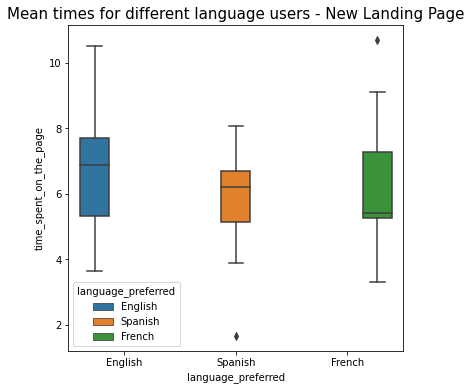

In [34]:
# mean of time spent by languages
df_2 = df[df['landing_page']=='new']
print(df_2.groupby("language_preferred")["time_spent_on_the_page"].mean())

# draw the boxplot for visualization 
fig, ax = plt.subplots(figsize = (6,6))
a = sns.boxplot(x= "language_preferred", y = 'time_spent_on_the_page' , data = df_2, hue = 'language_preferred')
a.set_title("Mean times for different language users - New Landing Page", fontsize=15)
plt.savefig("output-1.jpg", bbox_inches='tight')
plt.show()

### Let's test whether the assumptions are satisfied or not

* The populations are normally distributed - Assumed from the question statement.
* Samples are independent simple random samples - Yes, we are informed that the collected sample is a simple random sample.
* Population variances are equal - Assumed from the questions statement.

#### ANOVA 1-Way P-Value

In [35]:
#import the required function
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_value = f_oneway(df_2.loc[df['language_preferred'] == 'English', 'time_spent_on_the_page'],
                              df_2.loc[df['language_preferred'] == 'French', 'time_spent_on_the_page'],
                              df_2.loc[df['language_preferred'] == 'Spanish', 'time_spent_on_the_page'])
print('The p-value is ' + str(p_value))

The p-value is 0.43204138694325955


### Insight
As the p-value is larger than the significance level, we can fail to reject the null hypothesis. Hence, we do have enough statistical significance to conclude that  the average times spent on the new page is statistically the same. Language did not make a difference.

As expected, the preferred language did not have much of an effect on the time spent on the new web page.

language_preferred
English    4.454375
French     4.310000
Spanish    4.828235
Name: time_spent_on_the_page, dtype: float64


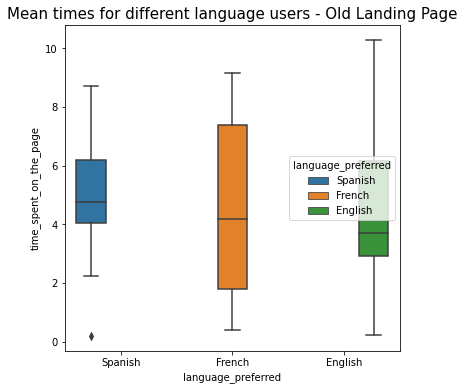

In [36]:
# mean of time spent by languages
df_3 = df[df['landing_page']=='old']
print(df_3.groupby("language_preferred")["time_spent_on_the_page"].mean())

# draw the boxplot for visualization 
fig, ax = plt.subplots(figsize = (6,6))
a = sns.boxplot(x= "language_preferred", y = 'time_spent_on_the_page' , data = df_3, hue = 'language_preferred')
a.set_title("Mean times for different language users - Old Landing Page", fontsize=15)
plt.show()

In [37]:
#import the required function
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_value = f_oneway(df_3.loc[df['language_preferred'] == 'English', 'time_spent_on_the_page'],
                              df_3.loc[df['language_preferred'] == 'French', 'time_spent_on_the_page'],
                              df_3.loc[df['language_preferred'] == 'Spanish', 'time_spent_on_the_page'])
print('The p-value is ' + str(p_value))

The p-value is 0.8393044037790174
